## Week 02 - Boston Housing Example

This example loads the Boston Housing data example and performs regression in Python. 

Author: Chris Kennedy


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics

### Prepare the Data

In [5]:
dfBoston = pd.read_excel(r'W2 - Boston Housing.xlsx')

In [7]:
dfBoston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,561.120
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,505.008
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,811.286
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,780.892
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,846.356


In [9]:
dfBoston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,521.986972
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,206.465044
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,116.900000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,398.044500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,495.656000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,584.500000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,1242.000000


Check for missing/null values

In [12]:
dfBoston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

Check datatypes for regression

In [14]:
dfBoston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
TAX          int64
PTRATIO    float64
MEDV       float64
dtype: object

Split the data into X and y:

In [23]:
y = dfBoston['MEDV']
X = dfBoston.drop(columns=['MEDV'])

### Prepare the Regressions

#### Specify Hyperparameters 
Normally we would calibrate the regularization parameter using a grid-search or cross-validation; however, for simplicity we are just using $\lambda$ = 10.0.


In [44]:
regLambda = 10.0 # Note that lambda is a protected word in python

Given hyperparameters, initialize the models - no hyperparameters for classical linear regression.

In [45]:
classicLR = LinearRegression()
ridgeLR = Ridge(alpha = regLambda)

#### Fit the models

In [24]:
model_CLR = classicLR.fit(X, y)

In [46]:
model_RLR = ridgeLR.fit(X, y)

#### Build predictions (in-sample)

In [47]:
yp = model_CLR.predict(X)
ypr = model_RLR.predict(X)

#### Simple performance metrics
We are not using a validation/holdout set this week. Typically cross-validation or train/validate/test splits would apply when evaluating machine learning models.

In [48]:
print("Classical: ")
print("R2:   %10.3f" % metrics.r2_score(y, yp))
print("RMSE: %10.4f" % metrics.mean_squared_error(y, yp) ** 0.5)
print("")
print("Ridge:")
print("R2:   %10.3f" % metrics.r2_score(y, ypr))
print("RMSE: %10.4f" % metrics.mean_squared_error(y, ypr) ** 0.5)

Classical: 
R2:        0.737
RMSE:   105.7196

Ridge:
R2:        0.728
RMSE:   107.5038


#### Output intercepts and coefficients for comparison

In [49]:
#  Simple vs. Regularized (Ridge)
cols= len(X.columns)
coeffs = [model_CLR.coef_, model_RLR.coef_]

print ("%8s" % "VAR", "%9s" % "SIMPLE", "%9s" % "RIDGE", "%9s" % "Delta")
print ("%8s" % "CONSTANT", "%9.4f" % model_CLR.intercept_, "%9.4f" % model_RLR.intercept_, "%9.4f" % (model_CLR.intercept_ - model_RLR.intercept_))    
for i in range(0,cols):
    print("%8s" % X.columns[i], "%9.4f" % coeffs[0][i], "%9.4f" % coeffs[1][i], "%9.4f" % (coeffs[0][i] - coeffs[1][i]))


     VAR    SIMPLE     RIDGE     Delta
CONSTANT  460.8067  287.9152  172.8914
    CRIM   -2.9659   -3.0527    0.0868
      ZN    0.6512    0.7459   -0.0947
   INDUS   -1.8057   -3.3139    1.5083
    CHAS   49.9448   36.7983   13.1466
     NOX -388.1702  -54.2600 -333.9102
      RM  150.8887  147.7418    3.1469
     AGE   -1.2088   -1.5286    0.3198
     DIS  -32.8275  -28.1377   -4.6898
     TAX   -0.0966   -0.1630    0.0664
 PTRATIO  -21.9390  -18.9238   -3.0152


### Plots and visualizations

In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Plot Y vs. Prediction using Classical and Ridge

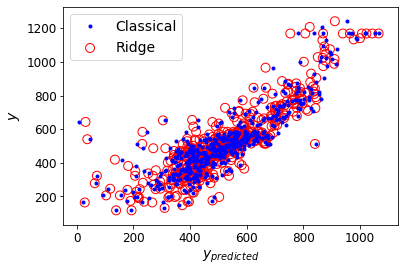

In [64]:
plt.plot(yp, y, "b.", label="Classical")
plt.scatter(ypr, y, s=80, facecolors='none', edgecolors='r', label="Ridge")
plt.xlabel("$y_{predicted}$")
plt.ylabel("$y$")
plt.legend(loc="upper left", fontsize=14)
plt.show()

Plot residuals for classical and ridge

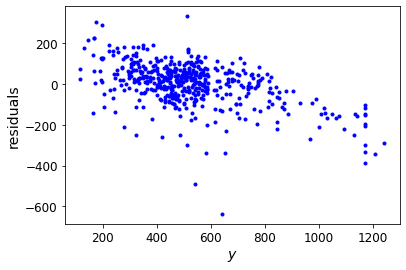

In [60]:
plt.plot(y, (yp - y), "b.")
plt.xlabel("$y$")
plt.ylabel("residuals")
plt.show()

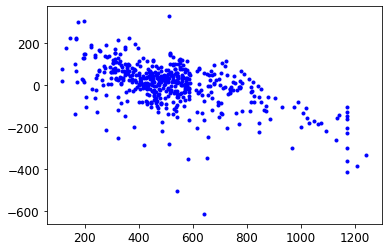

In [63]:
plt.plot(y,(ypr-y), "b.")
plt.show()

### End of Notebook!